In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import feature_importance

# Constants
DS = "../data/HR Employee Attrition.csv"
RANDOM_SEED = 0

# Read data set
df = pd.read_csv(filepath_or_buffer=DS)

#### Data Cleaning
- Indentify which columns have non numerical data
- Convert NaN data to numerical

In [ ]:
# Identifying NaN Columns
NaN_columns = df.select_dtypes(exclude='number').columns.tolist()
for col in NaN_columns:
    print(col)
    print(df[col].unique())

In [ ]:
# Numerizing NaN columns
df["Attrition"].replace({"Yes":1, "No":0}, inplace=True )
df["OverTime"].replace( {"Yes":1, "No":0}, inplace=True )
df["Over18"].replace( {"Y":1}, inplace=True)
df["BusinessTravel"].replace( {"Travel_Rarely":0.5, "Travel_Frequently":1, "Non-Travel":0}, inplace=True )
df["Gender"].replace( {"Female":1, "Male":0}, inplace=True )
df["MaritalStatus"].replace( {"Single":0, "Married":1, "Divorced":2}, inplace=True )
# Note: Columns [Department], [JobRole], [EducationField] wont be an input.
df.drop(columns=["Department", "JobRole", "EducationField"], inplace=True)

In [ ]:
# Spliting df to train data and test data
train_size = int(df.shape[0] * 0.8)
test_size = int(df.shape[0] - train_size)
train_df = df.sample(n=train_size, frac=None, replace=False, random_state=RANDOM_SEED, weights=None, axis="index")

#### Experiment 1
Find out which columns/employee attributes, contribute the most to employee attrition?

In [ ]:
# Get feature importance scores
ft_importance = feature_importance.get_feature_importance(data_set=train_df, random_seed=RANDOM_SEED, target_feature="Attrition")
# Higher score means that columns affects the target column the most
ft_importance

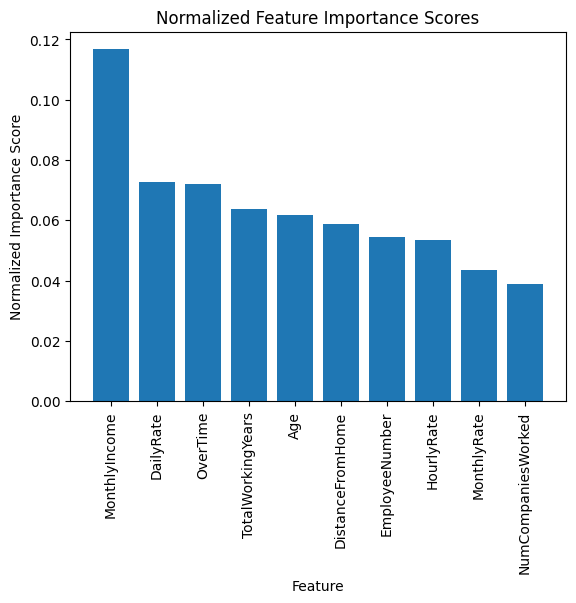

In [146]:
# Graphing the 10 most influential columns
ft = ft_importance[:,1].astype("float") # str to float
ft = (ft / np.sum(ft))[:10]             # Normalize scores
plt.bar(ft_importance[:10,0], ft)
plt.xticks(rotation="vertical")
plt.xlabel('Feature')
plt.ylabel('Normalized Importance Score')
plt.title('Normalized Feature Importance Scores')
# Save Grpah
graph_path = "../graph/Feature-Importance-Graph.png"
plt.savefig(graph_path)
# Show graph
plt.show()


#### Experiment 2
Given the attributes of an employee, what is the probability of their attrition?